In [9]:
import pandas as pd
df=pd.read_csv("student-performance.csv")

In [10]:
from sklearn.model_selection import train_test_split
inputs=df.drop(['school','G3','sex','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'],axis='columns')
target=df['G3']

In [11]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
le_school=LabelEncoder()
le_address=LabelEncoder()
le_famsize=LabelEncoder()
le_Pstatus=LabelEncoder()
le_Medu=LabelEncoder()
le_Fedu=LabelEncoder()
le_Mjob=LabelEncoder()
le_Fjob=LabelEncoder()
le_reason=LabelEncoder()
le_guardian=LabelEncoder()
le_schoolsup=LabelEncoder()
le_famsup=LabelEncoder()
le_paid=LabelEncoder()
le_activities=LabelEncoder()
le_nursery=LabelEncoder()
le_higher=LabelEncoder()
le_internet=LabelEncoder()
le_romantic=LabelEncoder()

inputs['sex_n']=le_sex.fit_transform(df['sex'])
inputs['school_n']=le_school.fit_transform(df['school'])
inputs['address_n']=le_address.fit_transform(df['address'])
inputs['famsize_n']=le_famsize.fit_transform(df['famsize'])
inputs['Pstatus_n']=le_Pstatus.fit_transform(df['Pstatus'])
inputs['Medu_n']=le_Medu.fit_transform(df['Medu'])
inputs['Fedu_n']=le_Fedu.fit_transform(df['Fedu'])
inputs['Mjob_n']=le_Mjob.fit_transform(df['Mjob'])
inputs['Fjob_n']=le_Fjob.fit_transform(df['Fjob'])
inputs['reason_n']=le_reason.fit_transform(df['reason'])
inputs['guardian_n']=le_guardian.fit_transform(df['guardian'])
inputs['schoolsup_n']=le_schoolsup.fit_transform(df['schoolsup'])
inputs['famsup_n']=le_famsup.fit_transform(df['famsup'])
inputs['paid_n']=le_paid.fit_transform(df['paid'])
inputs['activities_n']=le_activities.fit_transform(df['activities'])
inputs['nursery_n']=le_nursery.fit_transform(df['nursery'])
inputs['higher_n']=le_higher.fit_transform(df['higher'])
inputs['internet_n']=le_internet.fit_transform(df['internet'])
inputs['romantic_n']=le_romantic.fit_transform(df['romantic'])
print(inputs)

     age  traveltime  studytime  failures  famrel  freetime  goout  Dalc  \
0     18           2          2         0       4         3      4     1   
1     17           1          2         0       5         3      3     1   
2     15           1          2         0       4         3      2     2   
3     15           1          3         0       3         2      2     1   
4     16           1          2         0       4         3      2     1   
..   ...         ...        ...       ...     ...       ...    ...   ...   
644   19           1          3         1       5         4      2     1   
645   18           1          2         0       4         3      4     1   
646   18           2          2         0       1         1      1     1   
647   17           2          1         0       2         4      5     3   
648   18           3          1         0       4         4      1     3   

     Walc  health  ...  reason_n  guardian_n  schoolsup_n  famsup_n  paid_n  \
0       

In [12]:
X0_train, X0_test, y0_train, y0_test = train_test_split(inputs, target, test_size=0.2, random_state=21)
X1_train, X1_test, y1_train, y1_test = train_test_split(inputs, target, test_size=0.2, random_state=22)
X2_train, X2_test, y2_train, y2_test = train_test_split(inputs, target, test_size=0.2, random_state=3)
X3_train, X3_test, y3_train, y3_test = train_test_split(inputs, target, test_size=0.2, random_state=45)
X4_train, X4_test, y4_train, y4_test = train_test_split(inputs, target, test_size=0.2, random_state=51)

In [13]:
from sklearn import tree
model0=tree.DecisionTreeRegressor()
model1=tree.DecisionTreeRegressor()
model2=tree.DecisionTreeRegressor()
model3=tree.DecisionTreeRegressor()
model4=tree.DecisionTreeRegressor()
model0.fit(inputs,target)
model1.fit(X1_train,y1_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)
model4.fit(X4_train,y4_train)
importances=model0.feature_importances_+model1.feature_importances_+model2.feature_importances_+model3.feature_importances_+model4.feature_importances_
feature_names=X0_train.columns

In [14]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

         Feature  Importance
12            G2    4.147640
10      absences    0.190927
4         famrel    0.093874
0            age    0.055147
11            G1    0.051248
7           Dalc    0.039310
27  activities_n    0.038804
5       freetime    0.038127
18        Medu_n    0.030398
14      school_n    0.029583
19        Fedu_n    0.029219
22      reason_n    0.023753
20        Mjob_n    0.023746
3       failures    0.021651
9         health    0.020892
8           Walc    0.019937
21        Fjob_n    0.019897
30    internet_n    0.019180
2      studytime    0.018920
13         sex_n    0.015822
6          goout    0.013334
23    guardian_n    0.013278
1     traveltime    0.011582
25      famsup_n    0.006159
15     address_n    0.005352
16     famsize_n    0.005315
24   schoolsup_n    0.004593
26        paid_n    0.003441
28     nursery_n    0.003187
17     Pstatus_n    0.002619
31    romantic_n    0.002593
29      higher_n    0.000469


In [15]:
# sorting data
data=zip(feature_names,importances)
sorted_data=sorted(data,key=lambda x:x[1],reverse="true")
top_features,top_importances=zip(*sorted_data[:10])

<function matplotlib.pyplot.show(close=None, block=None)>

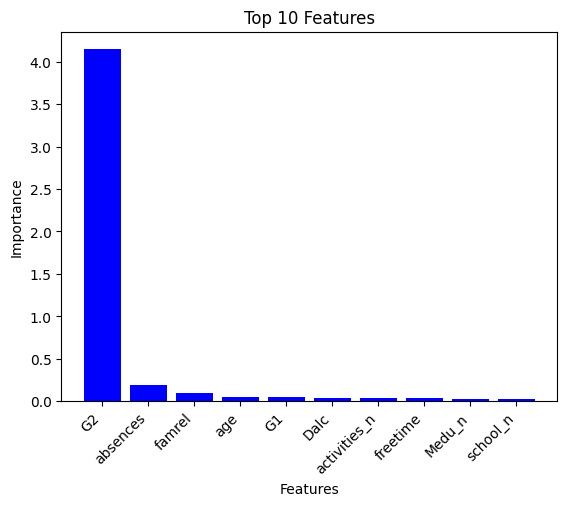

In [16]:
import matplotlib.pyplot as plt
plt.bar(top_features,top_importances,color="blue")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title("Top 10 Features")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show